# Frozenlake Q learning exercise

In [1]:
import gymnasium as gym
import collections
import matplotlib.pyplot as plt

In [2]:
ENV_NAME = "FrozenLake-v1"
GAMMA = 0.9
ALPHA = 0.2
TEST_EPISODES = 20

In [3]:
class Agent:
    def __init__(self):
        self.env = gym.make(ENV_NAME)
        self.state = self.env.reset()
        self.values = collections.defaultdict(float)

    def sample_env(self):
        action = self.env.action_space.sample()
        old_state = self.state
        new_state, reward, is_done, truncated, info = self.env.step(action)
        self.state = self.env.reset()[0] if is_done else new_state
        return old_state, action, reward, new_state

    def best_value_and_action(self, state):
        best_value, best_action = None, None
        if isinstance(state, tuple):
            state = state[0]
        for action in range(self.env.action_space.n):
            action_value = self.values[(state, action)]
            if best_value is None or best_value < action_value:
                best_value = action_value
                best_action = action
        return best_value, best_action

    def value_update(self, s, a, r, next_s):
        best_v, _ = self.best_value_and_action(next_s)
        new_v = r + GAMMA * best_v
        if isinstance(s, tuple):
            s = s[0]
        old_v = self.values[(s, a)]
        self.values[(s, a)] = old_v * (1-ALPHA) + new_v * ALPHA

    def play_episode(self, env):
        total_reward = 0.0
        state = env.reset()
        while True:
            _, action = self.best_value_and_action(state)
            new_state, reward, is_done, truncated, info = env.step(action)
            total_reward += reward
            if is_done:
                break
            state = new_state
        return total_reward


In [4]:
test_env = gym.make(ENV_NAME)
agent = Agent()
rewards = []

iter_no = 0
best_reward = 0.0
while True:
    iter_no += 1
    s, a, r, next_s = agent.sample_env()
    agent.value_update(s, a, r, next_s)

    reward = 0.0

    for _ in range(TEST_EPISODES):
        reward += agent.play_episode(test_env)

    reward /= TEST_EPISODES
    rewards.append(reward)

    if reward > best_reward:
        print(f"Best reward updated {best_reward:.3f} -> {reward:.3f}")
        best_reward = reward

    if reward > 0.80:
        print("Solved in %d iterations!" % iter_no)
        break


Best reward updated 0.000 -> 0.050
Best reward updated 0.050 -> 0.100
Best reward updated 0.100 -> 0.150
Best reward updated 0.150 -> 0.200
Best reward updated 0.200 -> 0.250
Best reward updated 0.250 -> 0.300
Best reward updated 0.300 -> 0.350
Best reward updated 0.350 -> 0.400
Best reward updated 0.400 -> 0.450
Best reward updated 0.450 -> 0.500
Best reward updated 0.500 -> 0.550
Best reward updated 0.550 -> 0.750
Best reward updated 0.750 -> 0.850
Solved in 10115 iterations!


[]

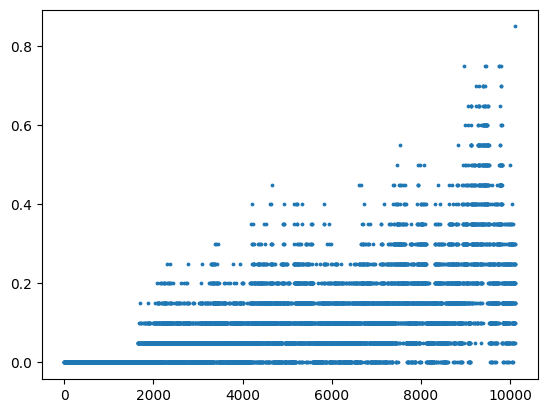

In [5]:
plt.scatter(range(iter_no), rewards, s=3)
plt.plot()